In [3]:
from openvino.inference_engine import IECore
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Personal\AppData\Roaming\Python\Python39\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [4]:
ie = IECore()
net = ie.read_network(
    model = 'face-detection-0200.xml',
    weights = 'face-detection-0200.bin'
)

model = ie.load_network(net, "CPU")

C:\Users\Personal\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print(model.input_info)
print(model.outputs)
print(model.input_info['image'].tensor_desc.dims)

{'image': <openvino.inference_engine.ie_api.InputInfoCPtr object at 0x000001E5FF596270>}
{'detection_out': <openvino.inference_engine.ie_api.CDataPtr object at 0x000001E5E5047DB0>}
[1, 3, 256, 256]


(800, 1200, 3)


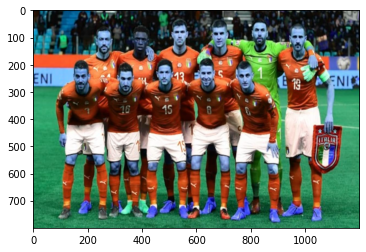

In [6]:
img = cv2.imread('football.jpg')
print(img.shape)
plt.imshow(img)

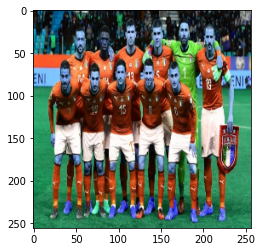

In [7]:
resized = cv2.resize(img, (256, 256))
resized.shape
plt.imshow(resized)

In [8]:
transposed = np.transpose(resized, (2,0,1))
transposed.shape

(3, 256, 256)

In [9]:
input_image = np.array([transposed], dtype=np.float32)
input_image.shape

(1, 3, 256, 256)

In [10]:
result = model.infer({"image" : input_image})
result

{'detection_out': array([[[[0.        , 0.        , 0.995378  , ..., 0.09809081,
           0.2385857 , 0.19746786],
          [0.        , 0.        , 0.9925121 , ..., 0.28155762,
           0.3088432 , 0.37838733],
          [0.        , 0.        , 0.98650396, ..., 0.2552873 ,
           0.4232143 , 0.34548348],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]]]], dtype=float32)}

In [11]:
result['detection_out'][0,0][0]

array([0.        , 0.        , 0.995378  , 0.19640212, 0.09809081,
       0.2385857 , 0.19746786], dtype=float32)

In [12]:
img.shape

(800, 1200, 3)

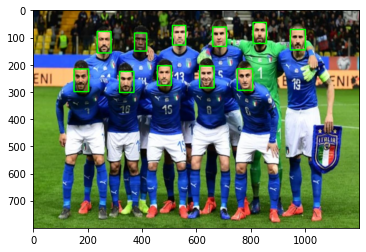

In [13]:
output_image = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
for i in result['detection_out'][0,0]:
    if i[2] >= 0.5: # mencetak kotak bila keyakinan model lebih dari 50%
        tinggi, lebar, channel = output_image.shape
        cv2.rectangle(
            output_image,
            (int(lebar*i[3]), int(tinggi*i[4])),
            (int(lebar*i[5]), int(tinggi*i[6])),
            (0,255,0),3
        )
plt.imshow(output_image)

In [15]:
final_image = cv2.cvtColor(output_image.copy(), cv2.COLOR_BGR2RGB)
cv2.imwrite("football_team_identificated.jpg", final_image)

True